# Проект по SQL

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Описание-проекта:" data-toc-modified-id="Описание-проекта:-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Описание проекта:</a></span></li><li><span><a href="#Описание--и-загрузка-данных" data-toc-modified-id="Описание--и-загрузка-данных-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Описание  и загрузка данных</a></span><ul class="toc-item"><li><span><a href="#Исследование-таблиц" data-toc-modified-id="Исследование-таблиц-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Исследование таблиц</a></span></li></ul></li><li><span><a href="#Задание-1" data-toc-modified-id="Задание-1-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Задание 1</a></span></li><li><span><a href="#Задание-2" data-toc-modified-id="Задание-2-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Задание 2</a></span></li><li><span><a href="#Задание-3" data-toc-modified-id="Задание-3-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Задание 3</a></span></li><li><span><a href="#Задание-4" data-toc-modified-id="Задание-4-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Задание 4</a></span></li><li><span><a href="#Задание-5" data-toc-modified-id="Задание-5-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Задание 5</a></span></li><li><span><a href="#Общий-вывод:" data-toc-modified-id="Общий-вывод:-8"><span class="toc-item-num">8&nbsp;&nbsp;</span>Общий вывод:</a></span></li></ul></div>

## Описание проекта:

Анализ базы данных электроннного сервиса для чтения книг по подписке

**Цель проекта:** 

Проанализировать базу данных c информаций о книгах, издательствах, авторах и пользовательских обзорах книг для целей формирования ценностного предложения для нового продукта.


**Задания:**

- Посчитайте, сколько книг вышло после 1 января 2000 года;
- Для каждой книги посчитайте количество обзоров и среднюю оценку;
- Определите издательство, которое выпустило наибольшее число книг толще 50 страниц — так вы исключите из анализа брошюры;
- Определите автора с самой высокой средней оценкой книг — учитывайте только книги с 50 и более оценками;
- Посчитайте среднее количество обзоров от пользователей, которые поставили больше 50 оценок.

## Описание  и загрузка данных

In [1]:
# импортируем библиотеки 
import pandas as pd 
from sqlalchemy import create_engine 

In [2]:
pd.options.display.float_format = '{:.2f}'.format 
pd.set_option('max_colwidth', 1)
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [3]:
# устанавливаем параметры 
db_config = {'user': 'praktikum_student', # имя пользователя 
             'pwd': 'Sdf4$2;d-d30pp', # пароль 
             'host': 'rc1b-wcoijxj3yxfsf3fs.mdb.yandexcloud.net', 
             'port': 6432, # порт подключения 
             'db': 'data-analyst-final-project-db'} # название базы данных 
connection_string = 'postgresql://{}:{}@{}:{}/{}'.format(db_config['user'], 
                                                         db_config['pwd'], 
                                                         db_config['host'], 
                                                         db_config['port'], 
                                                         db_config['db']) 
# сохраняем коннектор 
engine = create_engine(connection_string, connect_args={'sslmode':'require'}) 

In [4]:
def sql(query):
    '''Функция передает запрос в формате SQL методу read_sql.
    '''
    query = pd.io.sql.read_sql(query, con = engine)
    return query

### Исследование таблиц     
Выведем первые строки таблиц на экран и посмомтрим основную информацию

**Таблица `books`**

Содержит данные о книгах:

- `book_id` — идентификатор книги;
- `author_id` — идентификатор автора;
- `title` — название книги;
- `num_pages` — количество страниц;
- `publication_date` — дата публикации книги;
- `publisher_id` — идентификатор издателя.

In [5]:
books = ''' SELECT * 
            FROM books
        '''

In [6]:
sql(books).head()
sql(books).info()

,book_id,author_id,title,num_pages,publication_date,publisher_id
0,1,546,'Salem's Lot,594,2005-11-01,93
1,2,465,1 000 Places to See Before You Die,992,2003-05-22,336
2,3,407,13 Little Blue Envelopes (Little Blue Envelope #1),322,2010-12-21,135
3,4,82,1491: New Revelations of the Americas Before Columbus,541,2006-10-10,309
4,5,125,1776,386,2006-07-04,268


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   book_id           1000 non-null   int64 
 1   author_id         1000 non-null   int64 
 2   title             1000 non-null   object
 3   num_pages         1000 non-null   int64 
 4   publication_date  1000 non-null   object
 5   publisher_id      1000 non-null   int64 
dtypes: int64(4), object(2)
memory usage: 47.0+ KB


**Таблица `authors`**

Содержит данные об авторах:
- `author_id` — идентификатор автора;
- `author` — имя автора.

In [7]:
authors = ''' SELECT * 
              FROM authors
          '''

In [8]:
sql(authors).head()
sql(authors).info()

,author_id,author
0,1,A.S. Byatt
1,2,Aesop/Laura Harris/Laura Gibbs
2,3,Agatha Christie
3,4,Alan Brennert
4,5,Alan Moore/David Lloyd


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 636 entries, 0 to 635
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   author_id  636 non-null    int64 
 1   author     636 non-null    object
dtypes: int64(1), object(1)
memory usage: 10.1+ KB


**Таблица `publishers`**

Содержит данные об издательствах:

- `publisher_id` — идентификатор издательства;
- `publisher` — название издательства.

In [9]:
publishers = ''' SELECT * 
                 FROM publishers
             '''

In [10]:
sql(publishers).head()
sql(publishers).info()

,publisher_id,publisher
0,1,Ace
1,2,Ace Book
2,3,Ace Books
3,4,Ace Hardcover
4,5,Addison Wesley Publishing Company


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 340 entries, 0 to 339
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   publisher_id  340 non-null    int64 
 1   publisher     340 non-null    object
dtypes: int64(1), object(1)
memory usage: 5.4+ KB


**Таблица `ratings`**

Содержит данные о пользовательских оценках книг:

- `rating_id` — идентификатор оценки;
- `book_id` — идентификатор книги;
- `username` — имя пользователя, оставившего оценку;
- `rating` — оценка книги.

In [11]:
ratings = ''' SELECT * 
              FROM ratings
          '''

In [12]:
sql(ratings).head()
sql(ratings).info()

,rating_id,book_id,username,rating
0,1,1,ryanfranco,4
1,2,1,grantpatricia,2
2,3,1,brandtandrea,5
3,4,2,lorichen,3
4,5,2,mariokeller,2


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6456 entries, 0 to 6455
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   rating_id  6456 non-null   int64 
 1   book_id    6456 non-null   int64 
 2   username   6456 non-null   object
 3   rating     6456 non-null   int64 
dtypes: int64(3), object(1)
memory usage: 201.9+ KB


**Таблица `reviews`**

Содержит данные о пользовательских обзорах:
- `review_id` — идентификатор обзора;
- `book_id` — идентификатор книги;
- `username` — имя автора обзора;
- `text` — текст обзора.

In [13]:
reviews = ''' SELECT * 
              FROM reviews
          '''

In [14]:
sql(reviews).head()
sql(reviews).info()

,review_id,book_id,username,text
0,1,1,brandtandrea,Mention society tell send professor analysis. Over provide race technology continue these.
1,2,1,ryanfranco,Foot glass pretty audience hit themselves. Among admit investment argue security.
2,3,2,lorichen,Listen treat keep worry. Miss husband tax but person sport treatment industry. Kitchen decision deep the. Social party body the.
3,4,3,johnsonamanda,Finally month interesting blue could nature cultural bit. Prepare beat finish grow that smile teach. Dream me play near.
4,5,3,scotttamara,Nation purpose heavy give wait song will. List dinner another whole positive radio fast. Music staff many green.


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2793 entries, 0 to 2792
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   review_id  2793 non-null   int64 
 1   book_id    2793 non-null   int64 
 2   username   2793 non-null   object
 3   text       2793 non-null   object
dtypes: int64(2), object(2)
memory usage: 87.4+ KB


**Вывод:** Данные в порядке, пропусков нет.

**Схема базы данных:**

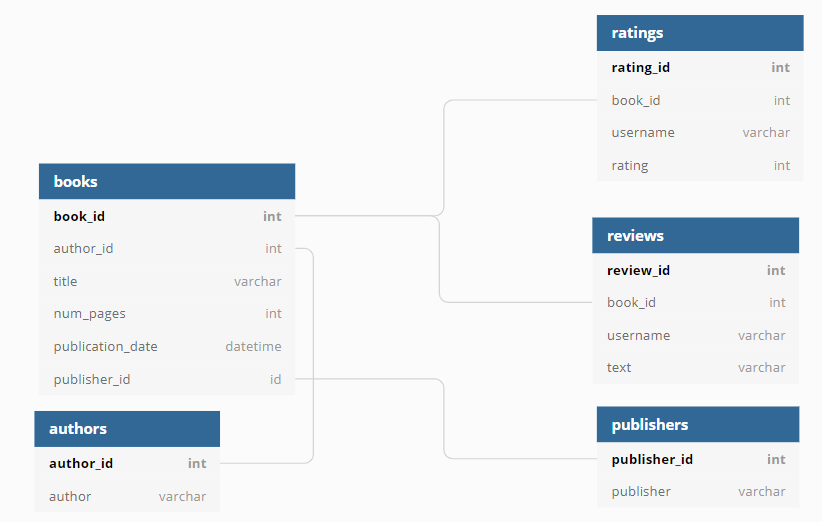

## Задание 1 
Посчитаем сколько книг вышло после 1 января 2000 года;

In [15]:
query = ''' 
SELECT COUNT (book_id)  
FROM books
WHERE publication_date > '2000-01-01'
'''
sql(query)

,count
0,819


**Вывод:** после 1 января 2000 года (со 2 января) вышло 819 книг. Включетильно с 1 января 2000 выпущена 821 книга. 

## Задание 2
Посчитае количество обзоров и среднюю оценку для каждой книги

In [16]:
query = '''
SELECT b.book_id AS book_id,
       b.title AS book_name,
       rv.count AS reviews_count,
       rt.avg_rat AS avg_rating
FROM books AS b
LEFT JOIN
    (SELECT book_id,
            AVG(rating) AS avg_rat
     FROM ratings
     GROUP BY book_id) AS rt ON b.book_id = rt.book_id
LEFT JOIN
    (SELECT book_id,
            COUNT(review_id) AS count
     FROM reviews
     GROUP BY book_id) AS rv ON b.book_id = rv.book_id                 
'''
sql(query)

,book_id,book_name,reviews_count,avg_rating
0,652,The Body in the Library (Miss Marple #3),2.00,4.50
1,273,Galápagos,2.00,4.50
2,51,A Tree Grows in Brooklyn,5.00,4.25
3,951,Undaunted Courage: The Pioneering First Mission to Explore America's Wild Frontier,2.00,4.00
4,839,The Prophet,4.00,4.29
...,...,...,...,...
995,64,Alice in Wonderland,4.00,4.23
996,55,A Woman of Substance (Emma Harte Saga #1),2.00,5.00
997,148,Christine,3.00,3.43
998,790,The Magicians' Guild (Black Magician Trilogy #1),2.00,3.50


**Вывод:** в базе всего 1000 книг. Для них расчитано количество ревью и средний рейтинг.

## Задание 3 
Определим издательство, которое выпустило наибольшее число книг толще 50 страниц

In [17]:
query = '''
SELECT p.publisher_id,
       p.publisher,
       COUNT(b.book_id) AS books_count
FROM publishers AS p
INNER JOIN books AS b ON p.publisher_id = b.publisher_id
WHERE b.num_pages > 50
GROUP BY p.publisher_id
ORDER BY COUNT(b.book_id) DESC
'''
sql(query)

,publisher_id,publisher,books_count
0,212,Penguin Books,42
1,309,Vintage,31
2,116,Grand Central Publishing,25
3,217,Penguin Classics,24
4,33,Ballantine Books,19
...,...,...,...
329,34,Ballantine Books (NY),1
330,225,Plaza y Janés,1
331,138,HarperCollinsPublishers,1
332,245,Random House: Modern Library,1


**Вывод:** Издательство «Penguin Books» выпустило наибольшее число книг толще 50 страниц - 42 книги.

## Задание 4 
Определим автора с самой высокой средней оценкой книг — учитываются только книги с 50 и более оценками.

In [18]:
query = '''
SELECT a.author_id,
       a.author,
       AVG(rt.rating) AS avg_rating
FROM authors AS a
INNER JOIN books AS b ON a.author_id = b.author_id
INNER JOIN ratings AS rt ON b.book_id = rt.book_id
WHERE rt.book_id IN
    (SELECT book_id
     FROM ratings
     GROUP BY book_id
     HAVING COUNT(rating_id) >= 50)
GROUP BY a.author_id
ORDER BY avg_rating DESC
LIMIT 1
'''
sql(query)

,author_id,author,avg_rating
0,236,J.K. Rowling/Mary GrandPré,4.29


**Вывод:** Самая высокая средняя оценка книг (4.3) у J.K. Rowling/Mary GrandPré	(предположительно книги о Г.Поттере  достаточно популярны) 

## Задание 5
Посчитаем среднее количество обзоров от пользователей, которые поставили больше 50 оценок.

In [19]:
query = '''
SELECT AVG(rv.rev_count) AS avg_review_count
FROM
  (SELECT username,
          COUNT(review_id) AS rev_count
   FROM reviews
   WHERE username IN
       (SELECT username
        FROM ratings
        GROUP BY username
        HAVING COUNT(rating_id) > 50)
   GROUP BY username) AS rv;
'''
sql(query)

,avg_review_count
0,24.33


**Вывод:** Среднее количество обзоров от пользователей, которые поставили больше 50 оценок - 24,3 обзора.

## Общий вывод:

В рамках выполнения цели по анализу базу данных сервиса для чтения книг по подписке, было выполнено 5 заданий, для решения которых мы выполнили подключение к базе данных сервиса , изучили общие данные о таблицах и с помощью SQL-запросов получили необходимую информацию. Эти данные помогут сформулировать ценностное предложение для нового продукта.

Результаты исследования / запросов:   
- После 1 января 2000 года было выпущего 819 книг.
- В базе всего 1000 книг. Для каждой книги рассчитано количество обзоров и средняя оценка.
- Издательство «Penguin Books» выпустило наибольшее число книг толще 50 страниц - 42 книги.
- Самая высокая средняя оценка книг (4.3) у J.K. Rowling - писательница, которая придумала Гарри Поттера.
- Среднее количество обзоров от пользователей, которые поставили больше 50 оценок - чуть больше 24.